### Etapas do Projeto:
#### Aqui vamos definir como o projeto vai se desenvolver e a metodologia que vamos seguir, isso facilita em muito quando quisermos ir para alguem ponto especifico, pois vamos saber a etapa dele.

- Etapa 0: Entendimento do problema
    - A etapa de entedimento do problema e a etapa que está acima de nós, o contexto e o objetivo do problema já estão definidos, ou seja, já etendemos o problema, e soment assim podemos seguir em frente com o projeto.

- Etapa 1: Importas as bibliotecas necessarias
    - Aqui nos vamos realizar imports das bibliotecas mais usadas para tratamento de dados, plotar graficos e machine learning, e aqui que está o ouro do python, pois pela quantidade de coisas prontas, nos não precisamos criar tudo do zero, basta saber utilizar e modelar algo que já está feito.

- Etapa 2: Extração dos nossos dados
    - Nessa etapa que vamos trazer os nossos dados para o python, como explicado acima os dados estão e um formato de csv, ou seja, de alguma forma vamos ter que ler esses dados e traze-los para o python.

- Etapa 3: Tratamento dos dados
    - Aqui e uma etapa chave, sem o tratamento dos dados não vamos poder plotar graficos com facilidade, pois pode haver valores que não permitam, por isso um bom tratamento dos dados e a etapa primordial de qualquer projeto de Data Scince pois sem essa etapa, as coisas vão se complicar mais para frente.

- Etapa 4: Exploração dos dados
    - Nessa etapa que vamos plotar graficos e com base neles entender como os nossos dados estão dispostos, responder até algumas pergutas de negócio e já podemos ter a nossa resposta nessa etapa mesmo, sem a necessaridade de aplicar os modelos de machine learning, pois dependendo do nosso objetivo, ele já pode ser respodido com graficos.

- Etapa 5: Encondig dos dados
    - Aqui e outra etapa super importante, pois os modelos de Machine Learning, não conseguem ler textos, ou seja, a coluna de genero que temos disponiveis nos nossos dados, lá está para homens = M e para mulheres = F, o modelo não consegue entender essas letras assim ele precise que voce transforme essas letras para por exemplo, 0 = homens, 1 = mulheres, e assim ele vai conseguir aprender.

- Etapa 6: Aplicação dos modelos de ML e Avaliação deles.
    - Só depois de passar por esses 5 passos que nossos dados vão está prontos para serem dados para o modelo de ML, por isso as outras etapas são tão importantes e veem primeiro, pois sem ter uma boa base estuturada dos meus dados, não iremos conseguir fazer essa aplicação do modelo.

- Etapa 7: Melhorias no modelo
    - Caso o modelo não nos sadisfaça com o resultado dele, podemos buscar maneiras de tentar melhora-lo, como por exemplo adicionar mais parametros no modelo, excluir alguma coluna que não tenha tanta relevancia para o modelo, rever alguma atitude que eu tenha tomado anteriomente para ver se melhora o modelo ou não.
    - Essa e uma fase bem importante também, mas que na maioria dos casos não é tão necessaria, pois caso fizemos bem as 5 primeiras etapas, o nosso modelo vai ter um bom resultado naturalmente, então vamos ter que chegar lá para descobrir.

- Etapa 8: Teste nos modelos
    - Depois de tudo que fizemos para aplicar o modelo e testa ele, vamos para parte divertida, vamos testa esse modelo comparando ele com o valor real, vamos colocar o valor real em uma coluna e o valor previsto em outra para comparar como o modelo está se saindo ná prática.

- Etapa 9: Deploy do projeto
    - E aqui que "cuspimos" nossa ideia para fora do codigo, e aqui que criamos um WebApp em que a voce que está lendo agora, pode simplesmente entrar nele, e sem precisar modificar codigo e nem nada, obter os seus resultados, sendo necessario apenas passar suas informações para o modelo, isso é incrivel não é mesmo?

- Etapa 10 Final: Conclusão final
    - Nessa etapa que vou conclui o projeto com minhas considerações finais, falar como foi o projeto e se consegui atingir o meu objetivo, falar como foi construir o projeto, etc... uma conclusão.

---

### Iniciando o projeto:

#### Etapa 1: Importas as bibliotecas necessarias

In [1]:
#Bibliotecas padrões de qualquer projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#---
#Biblioteca de Encondig dos dados
from sklearn.preprocessing import LabelEncoder
#---
#Bibliotecas de Avaliação do modelo
from sklearn.metrics import classification_report
#---
#Bibliotecas de Machine Learning(ML)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#---
#Bibliotecas de seleção dos dados
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
#---
#Filtrar mensagem de erros irrelevantes
import warnings
warnings.filterwarnings('ignore')
#---
#Plotar os graficos
%matplotlib inline

---

#### Etapa 2: Extração dos nossos dados

In [2]:
#Extraindo os dados do arquivo csv com o pandas.
df = pd.read_csv('Placement_Data_Full_Class.csv')

#Exibindo as primeiras entradas
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


---

#### Etapa 3: Tratamento dos dados

In [3]:
#Verificando informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
#Verificando valores nulos
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

- Como podemos notar, existem 67 valores nulos na coluna salário, para resolvemos esse problema nos podemos fazer duas coisas, 
    - 1: Troca o valor pelo média, mediana, etc...
    - 2: Rever nosso objetivo, pois o nosso objetivo e ver quem está qualificado para a vaga, então a pessoa não vai ter salario ainda, ou seja, salario não tem nada haver com meu objetivo.
    

- Qual caminho eu vou preferir tomar?
    - Como eu vou querer uma analises de comparação do salario, ver o maximo e o minino, ver quem recebe mais, etc... ter uma ideia geral dos meus dados, para isso será necessaria a coluna de salário.

- Qual a forma de substituição que eu vou usar?
    - Eu vou testar aqui 3 formas de substituição desses valores.
        - 1 forma: Média dos salarios
        - 2 forma: Mediana dos salarios
        - 3 forma: Valor que mais aparece nos dados.

In [5]:
#Criando uma função que vai me trazer a comparação das 3 formas acima com a coluna de salario.

def plotdistplot(coluna):
    
    plt.figure(figsize=(15,7))
    sns.distplot(df['salary'] , kde=True, hist=False, label='Salário Real', color='orange')
    sns.distplot(df[coluna], kde=True, hist=False, label=coluna ,color='black')

In [6]:
#Usando as 3 formas e adicionando ao df

#Forma 1
df['Salario_Médio'] = df['salary'].fillna(df['salary'].mean())

#Forma 2
df['Salario_Médiana'] = df['salary'].fillna(df['salary'].median())

#Forma 3
df['Salario_mais_Frequente'] = df['salary'].fillna(df['salary'].mode()[0])


#Exibindo meu Df
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Salario_Médio,Salario_Médiana,Salario_mais_Frequente
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0


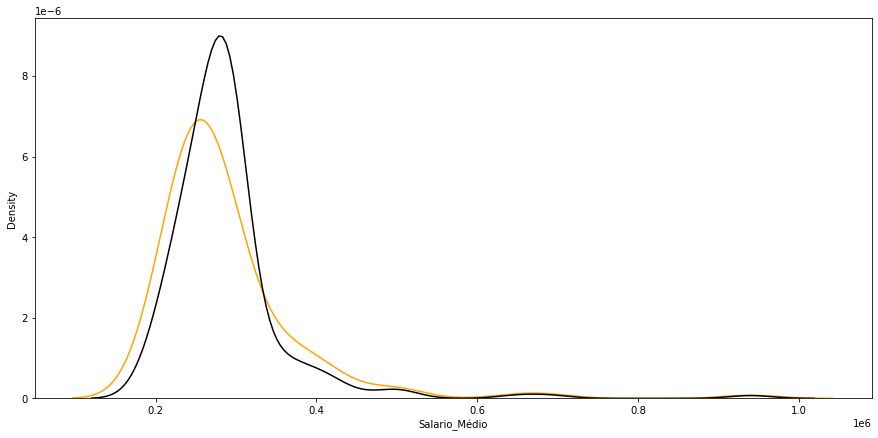

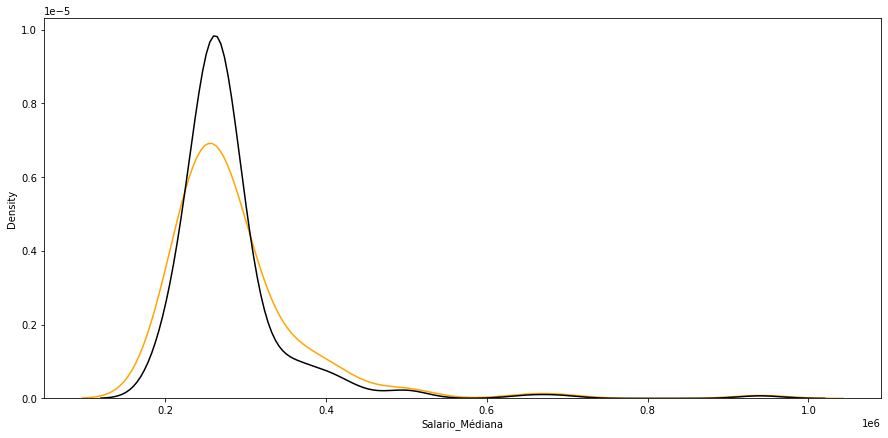

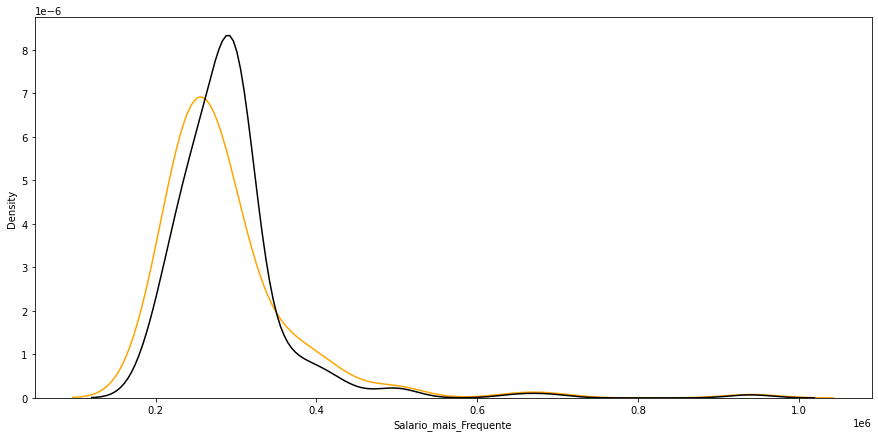

In [7]:
#Agora vamos usar criar uma lista com os salarios e percorrer ela plotando os graficos.

lista_salarios = ['Salario_Médio','Salario_Médiana','Salario_mais_Frequente']


#Percorrendo e comparando com o salario real

for salario in lista_salarios:
    plotdistplot(salario)

- Tenho a impressão de que a linha preta de Salario_mais_Frequente e a que menos puxa para cima e a que está mais proxima do valor real que o salário, então eu vou usar ela, eu vou substituir os valores nulos, pelo valor mais frequente.

In [8]:
#Excluindo as colunas criadas apenas para conseguimos comparar o melhor para os nossos dados
df.drop(lista_salarios,axis=1,inplace=True)

In [9]:
#Modificando os valores vazios pelo valor mais frequente.
df['salary'].fillna(df['salary'].mode()[0],inplace=True)

In [10]:
#Revendo se ainda existe valores nulos
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [11]:
#Informações Estatisticas.
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,292190.697674
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,77636.740429
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,250000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,300000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


- Seleção de colunas
    - Outro problemas que podemos notas,

---

- E assim terminamos a fase de limpeza dos dados, claro que ainda vou ter que fazer um feature selection aqui, porém vou fazer mais para frente, primeiro eu preciso analisar meu dados para ter uma ideia das colunas que mais se adquam ao meu objetivo.

---

####  Etapa 4: Exploração dos dados


- Para começar a exploração dos meus cabeçalhos, eu vou separar ele entre dados categoricos e dados numericos.

In [12]:
#Cabeçalho categorico
dados_cat = list(df.select_dtypes(include=['object']).columns)

#Cabeçalho numerico
dados_num = list(df.select_dtypes(include=['int32','int64','float32','float64']).columns)

In [13]:
#Exibindo
print(dados_cat)
print('-'*90)
print(dados_num)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
------------------------------------------------------------------------------------------
['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


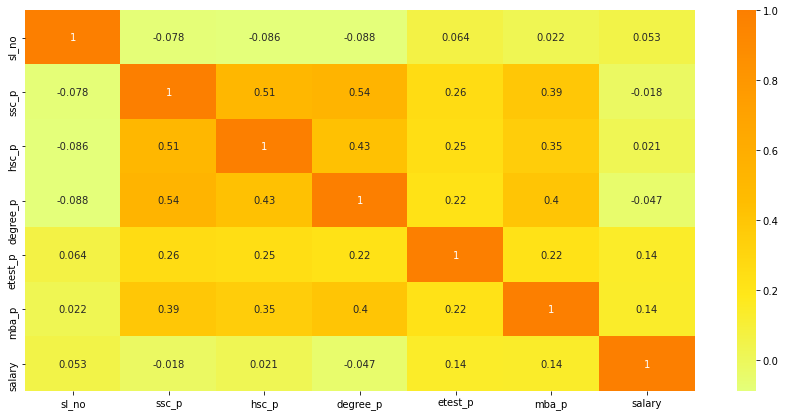

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='Wistia',annot=True);

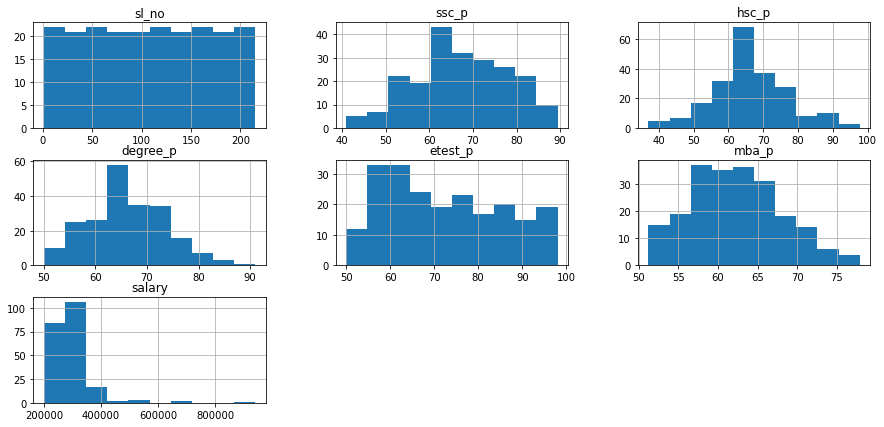

In [15]:
#Vamos ver como estão distribuidos nossos dados numericos
df.hist(figsize=(15,7));

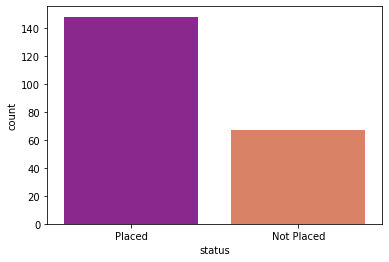

In [16]:
#Verificando a quantidade de valores que eu tenho na coluna de Status
sns.countplot(df['status'],palette='plasma');

- Como pode ser notado, estamos lidando com valores desbalanceados, ou seja, os valores de Placed são maiores do que o de Not Placed, mas por agora, vamos deixar assim, só mais para frente na aplicação do modelo que vamos ter certeza se essa discrepância de dados está prejudicando muito o nosso modelo.

In [17]:
#Definindo função que vai fazer esse retorna da contagem em forma grafica
#---
#Retornar a contagem em forma de dicionario

def valuecounts(coluna):
    return dict(df[coluna].value_counts())

#---

#Retorna a contagem em forma grafica
def getcountplot(coluna):
    
    sns.countplot(df[coluna],palette='plasma')
    plt.xticks(rotation = '45', fontweight = 'bold', fontsize='10')
    plt.xticks(rotation = '45', fontweight = 'bold', fontsize='10')
    plt.show()

Contagem dos valores para a coluna de gender


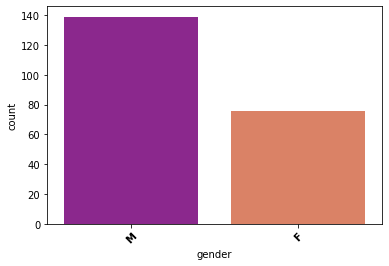

Contagem dos valores para a coluna de ssc_b


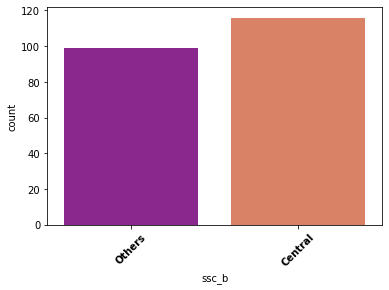

Contagem dos valores para a coluna de hsc_b


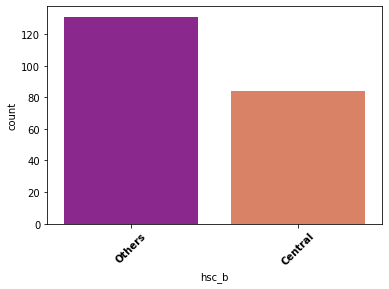

Contagem dos valores para a coluna de hsc_s


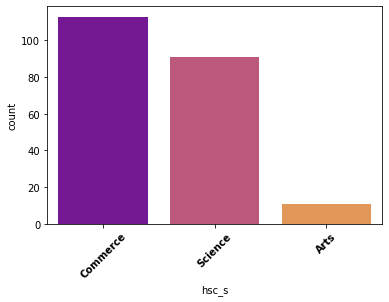

Contagem dos valores para a coluna de degree_t


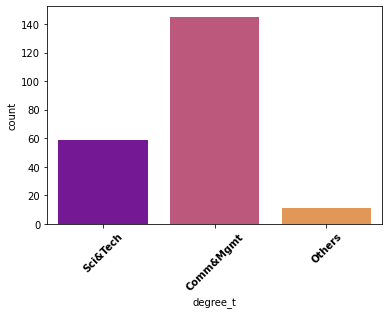

Contagem dos valores para a coluna de workex


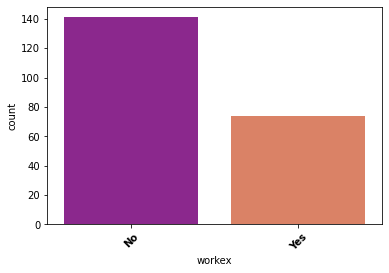

Contagem dos valores para a coluna de specialisation


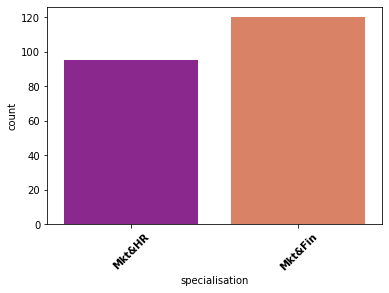

Contagem dos valores para a coluna de status


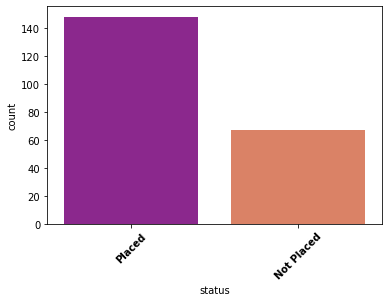

In [18]:
#aplicando a função em todas as colunas categoricas
for coluna in dados_cat:
    print(f'Contagem dos valores para a coluna de {coluna}')
    getcountplot(coluna)
    print('='*70)

- Como podemos notar, os valores não estão muito longe um do outro, está até que bem distribuidas nossas informações, com poucas categorias.

In [19]:
#Aplicando a função que retorna o dicionario
countdict = {}
for coluna in dados_cat:
    countdict[coluna] = valuecounts(coluna)
#Verificando
countdict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

- Em posse desses dados gerais, podemos agora se aprofundar um pouco e ir para a areá de BI para responder algumas perguntas de negocio que são, top 5 Estudantes graduados em Sci&Tech e na Commerce, entre outras coisas.

In [20]:
#Top 5 estudantes de Sci&Tech placed

#Filtrando o df para pegar as informações de Sci&Tech e Placed
filtro_df = df[ (df['degree_t']=='Sci&Tech') & (df['status']=='Placed')]

#Ordernando os dados do maior para o menor segundo a coluna de salary
filtro_df.sort_values(by='salary',ascending=False,inplace=True)

#Resetando o index e pegando os top 5
top_5 = filtro_df.reset_index().head(5)

#Exibindo
top_5

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
2,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


- Interresante ver como a areá de science e predominate, os top 5 maiores valores são dela.

In [21]:
#Top 5 salarios de  Comm&Mgmt(Em uma unica linha de codigo.)

top_Mg_5 = df[(df['degree_t']=='Comm&Mgmt') & (df['status'] == 'Placed')].sort_values(by='salary',ascending=False).reset_index().head(5)

#Exibibindo
top_Mg_5

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0


In [22]:
#Estudantes de Sci&Tech que possui o salario acima da média
df[(df['degree_t']=='Sci&Tech')&(df['salary']>df['salary'].mean())].sort_values(by='salary',ascending=False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
1,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
2,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0
6,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.0
7,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.0
8,70,71,M,82.00,Others,61.00,Others,Science,62.00,Sci&Tech,No,89.00,Mkt&Fin,65.45,Placed,360000.0
9,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0


- Como podemos ver, mesmo com poucos dados nos conseguimos tirar muita informação dele, pois podemos fazer a contagem, somar entre outras coisas, para resolver poblemas de negocio como esse que eu fiz acima, analises boas e relevantes para alguma certa areá tudo depende da areá e embora não seja esse meu objetivo e no futuro possa ter que fazer analises mais profundas nos dados, mas ai e melhor com o POWER BI

---

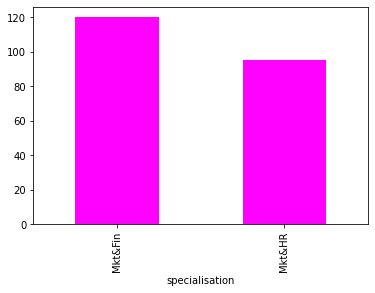

In [23]:
#Grafico com a contagem de valores de degree_t, vou usar o group by agora para poder plotar os graficos
df.groupby('specialisation')['status'].count().plot(kind='bar',color='magenta');

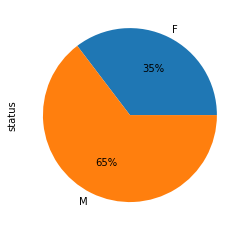

In [24]:
#Verificando a porcentagem de cada genero
df.groupby('gender')['status'].count().plot(kind='pie',autopct='%1.0f%%');

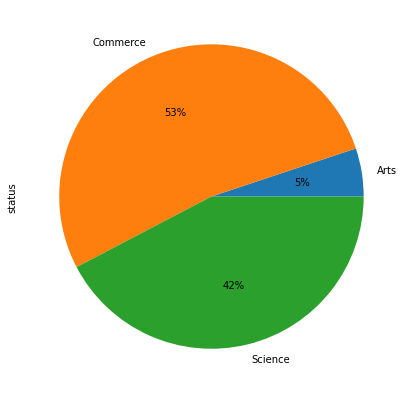

In [25]:
#Verificando agora o hsc_s
df.groupby('hsc_s')['status'].count().plot(kind='pie',autopct='%1.0f%%',figsize=(15,7));

---

#### Analise das colunas numericas

Graficos de distribuição para a coluna ssc_p


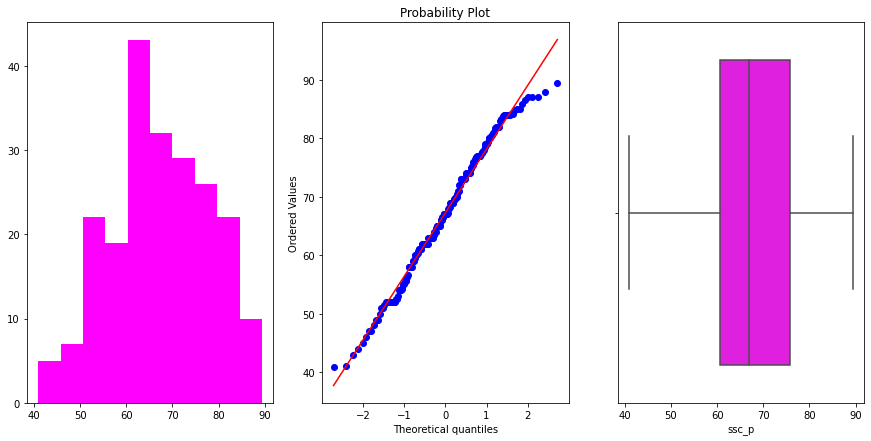

Graficos de distribuição para a coluna hsc_p


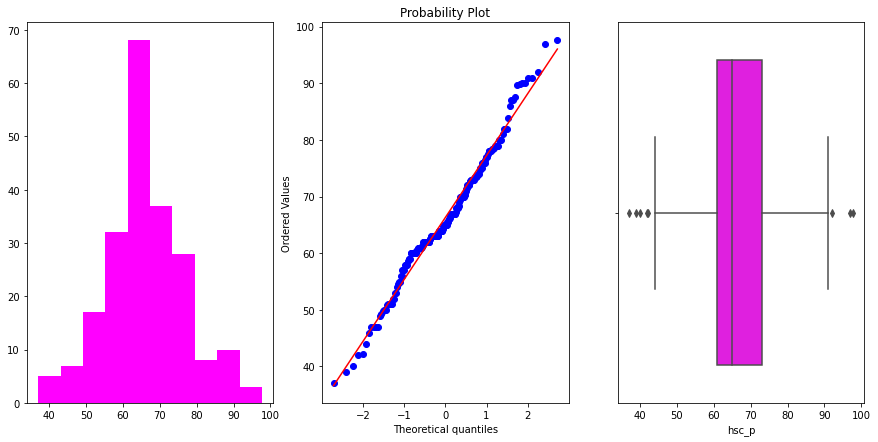

Graficos de distribuição para a coluna degree_p


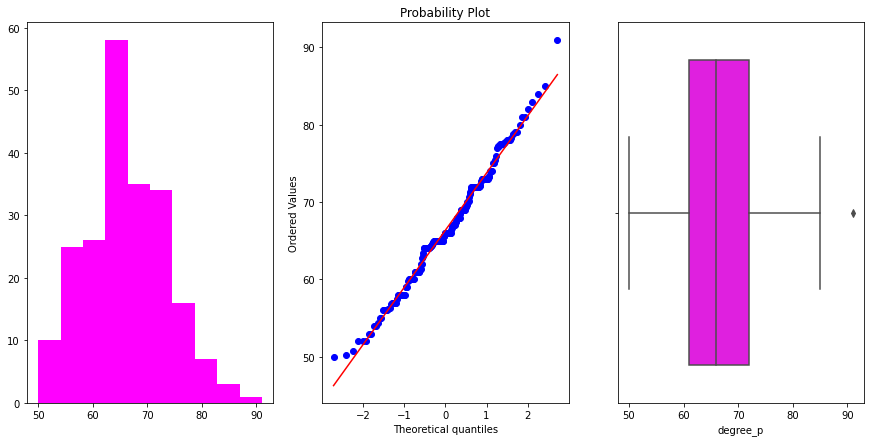

Graficos de distribuição para a coluna etest_p


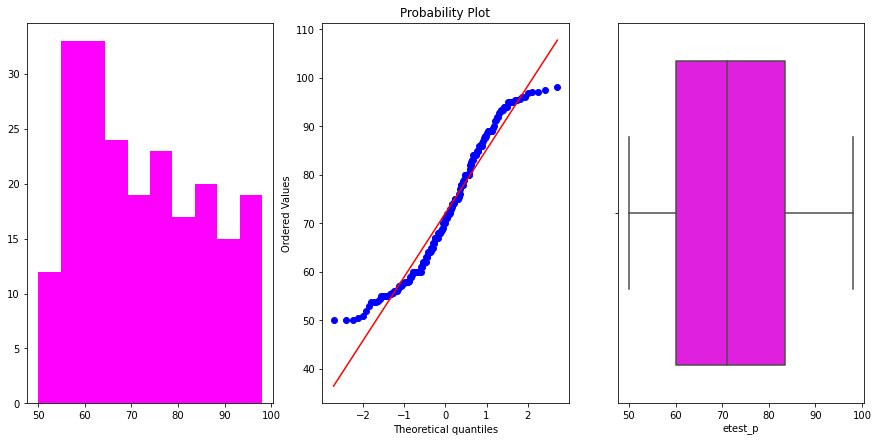

Graficos de distribuição para a coluna mba_p


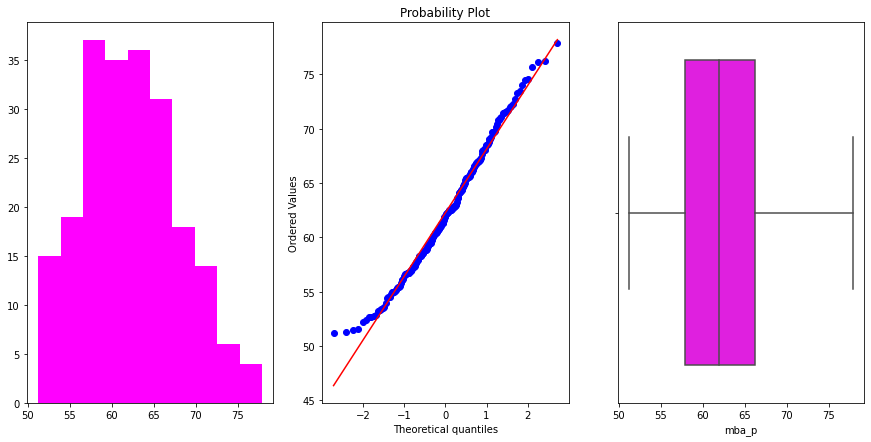

Graficos de distribuição para a coluna salary


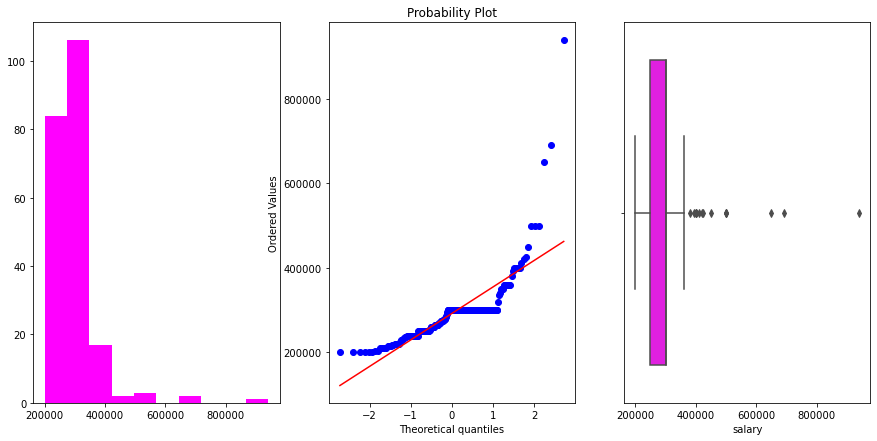

In [26]:
import scipy.stats as stats


def distplots(df,coluna):
    
    #Primeiro Grafico
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[coluna],color='magenta')
    
    #Segundo grafico
    plt.subplot(1,3,2)
    stats.probplot(df[coluna], dist='norm',plot=plt)
    
    #Terceiro grafico
    plt.subplot(1,3,3)
    sns.boxplot(df[coluna],color='magenta')
    
    plt.show()


for coluna in dados_num[1:]:
    print(f'Graficos de distribuição para a coluna {coluna}')
    distplots(df,coluna)
    print('='*10)

- A maioria das colunas numericas seguem um padrão ou melhor, uma distribuição normal, claro que há exceções, como por exemplo a coluna de salário, porém como vamos fazer uma seleção de colunas no futuro, vamos retira-la de qualquer forma, mas e bom para ter uma ideia geral dos meus dados numericos.

---

- E assim termina o processo de exploração dos dados
    - Nessa etapa eu:
            - plotei um heatmap
            - Resolvemos algumas perguntas de negocio.
            - Obtivemos uma ideia geral, por exemplo o homens serem mais dominantes no mercado
            

---

#### Etapa 5: Encondig dos dados

In [27]:
#Funçãoq eu vai fazer o encondig nos dados.
def labelencode(le,col):
    
    df[col] = le.fit_transform(df[col])
    
#Receber os dados com encondig
getmappings = {}


#Instancia do modelo
le = LabelEncoder()


#Percorendo as colunas
for col in list(countdict.keys()):
    labelencode(le,col)
    getmappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))
    

df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,300000.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


#### Feature Selection

- Aqui nos vamos usar dois metodos e através da interseção deles tirar as melhores colunas possiveis, esses metodos vai ser
    - Extra Trees
    - Mutual_info

- O objetivo e que esses dois modelos me forneçam as colunas mais relevantes, depois de obter essas colunas eu vou fazer uma interseção dos dados, e pegar apenas as colunas que aparecem nos dois modelo, ou seja, as melhores colunas

In [28]:
#Para isso primeiro eu tenho que separar meus dados entre treino e teste

#Criando uma copia dos meus dados para não danificar a estrutura original
copia_df = df.copy()

test = copia_df['status']
train = copia_df.drop(['status','salary','sl_no'],axis=1)

train.head()
#Removi a coluna de Salary pois como já havia comentado acima, ela não tem relação com meu objetivo, entõo não fazia sentido
#Mante-la.

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [29]:
#Extra Treee
modelo_ex = ExtraTreesClassifier()
modelo_ex.fit(train,test)

ExtraTreesClassifier()

<AxesSubplot:>

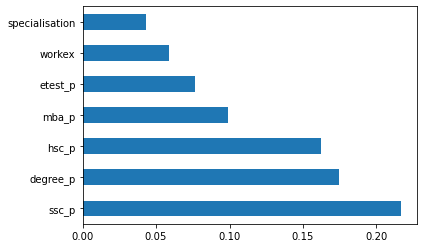

In [30]:
#Criando uma series com os dados da Extra Tree
Extra_bar = pd.Series(modelo_ex.feature_importances_,index=train.columns)

#Plotando o grafico com as 7 principais colunas.
Extra_bar.nlargest(7).plot(kind='barh')

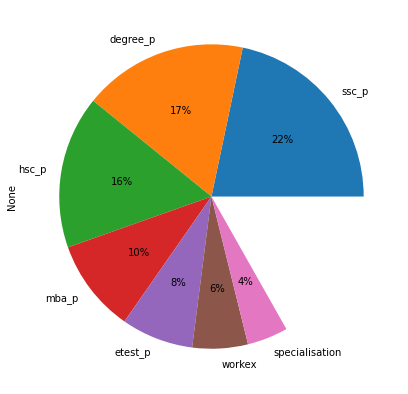

In [31]:
#Porcentagem que cada coluna representa
Extra_bar.nlargest(7).plot(kind='pie',autopct='%1.0f%%',figsize = (15,7));

---

<AxesSubplot:>

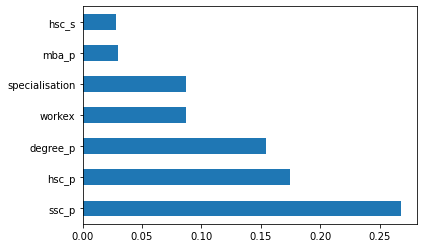

In [32]:
#Mutual_info_classif

#instanciando e treinando
modelo_mc = mutual_info_classif(train,test)

#Fazendo uma series com ela
Mutual = pd.Series(modelo_mc,index=train.columns)

#Grafico com as 7 principais colunas
Mutual.nlargest(7).plot(kind='barh')

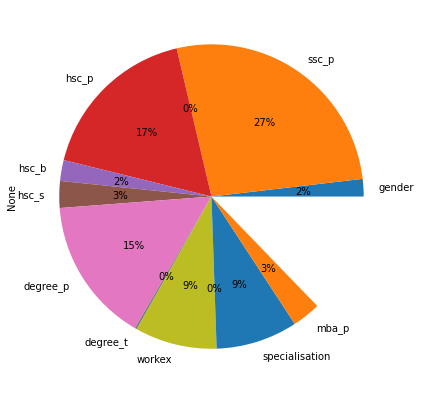

In [33]:
#Porcentagem que cada coluna representa
pd.Series(modelo_mc,index=train.columns).plot(kind = 'pie',autopct='%1.0f%%',figsize = (15,7));

---

- Agora temos dois modelos com suas respectivas visões sobre os dados e com suas colunas que acham mais relevantes.

In [35]:
#Vamos usar a interseção dos dois metodos para retirar as melhores colunas, a interseção e quando o valor e igual nas duas metricas

#Colunas do extra tree
Extra_bar_colum = list(Extra_bar.nlargest(10).index)

#Colunas do mutual info
Mult_bar_colum = list(Mutual.nlargest(10).index)

#Adicionando a interseção a uma variavel
Commum_columns = list(set(Extra_bar_colum).intersection(set(Mult_bar_colum)))

#Exibindo
print(Commum_columns)

['hsc_s', 'ssc_p', 'specialisation', 'hsc_p', 'gender', 'mba_p', 'degree_p', 'workex']


In [36]:
# renaming the cols

#Ordenar as coluans
train = train[['gender','specialisation','degree_t','workex','ssc_p','hsc_p','degree_p','mba_p']]

#Renomeando as colunas
train.columns = ['Gender','Specialisation','Techinal Degree','Work Experience','SSC_p','High School_p','Degree_p','MBA_p']
train.head()

,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p
0,1,1,2,0,67.00,91.00,58.00,58.80
1,1,0,2,1,79.33,78.33,77.48,66.28
2,1,0,0,0,65.00,68.00,64.00,57.80
3,1,1,2,0,56.00,52.00,52.00,59.43
4,1,0,0,0,85.80,73.60,73.30,55.50


- Dicionario das colunas que vamos utilizar
     - Gender: Gênero
     - Specialisation: Especialização
     - Techinal Degree: Grau Técnico
     - Work Experience: Experiência de trabalho
     - SSC_p: Comissão de Seleção de Pessoal_pontuação
     - High School_p: Ensino Médio_pontuação
     - Degree_p: Gradução_pontuação
     - MBA_p: Mestre em Administração de Negócios_pontuação

---

- E assim acabamos o processo de enconding, nessa etapa eu fiz
    - Processo de enconding das colunas de genero, transformando 0 quando for homem e 1 para mulher
    - FIz o processo de seleção de colunas mais relevantes atraves de dois modelos do sklearn
    - Fiz o dicionario das colunas

---

#### Etapa 6: Aplicação dos modelos de ML e Avaliação deles.